In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to use operating system dependent functionality
import librosa # to extract speech features
import wave # read and write WAV files
import matplotlib.pyplot as plt # to generate the visualizations
import numpy as np

# LSTM Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import rmsprop

Using TensorFlow backend.
C:\Users\Dell\anaconda3\envs\ambareesh\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dell\anaconda3\envs\ambareesh\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dell\anaconda3\envs\ambareesh\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dell\anaconda3\envs\ambareesh

In [2]:
def extract_mfcc(wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path_to_wav_file
    #Output: mfcc_features'''
    y, sr = librosa.load(wav_file_name,duration=3
                                  ,offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [3]:
##### load radvess speech data #####
radvess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file
for dirname, _, filenames in os.walk('C:/Users/Dell/Downloads/MaheshMajor/Dataset'):
    print(dirname)
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        radvess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name)) # extract MFCC features/file
        
print("Finish Loading the Dataset")

C:/Users/Dell/Downloads/MaheshMajor/Dataset
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_01
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_02
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_03
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_04
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_05
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_06
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_07
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_08
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_09
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_10
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_11
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_12
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_13
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_14
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_15
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_16
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_17
C:/Users/Dell/Downloads/MaheshMajor/Dataset\Actor_18
C:

In [4]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions

#### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical.shape

(2879, 8)

In [5]:
ravdess_speech_data_array.shape

(2879, 40)

In [6]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [7]:
len(x_train)
len(y_train)

2303

In [8]:
len(x_test)
len(y_test)

576

In [9]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [10]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [11]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [12]:
w.shape

(2303, 40, 1)

In [13]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=100, shuffle=True)


Train on 2303 samples, validate on 287 samples
Epoch 1/100
2303/2303 [==============================] - 4s 2ms/step - loss: 2.0643 - accuracy: 0.1719 - val_loss: 2.0090 - val_accuracy: 0.1742
Epoch 2/100
2303/2303 [==============================] - 3s 1ms/step - loss: 2.0153 - accuracy: 0.1767 - val_loss: 1.9554 - val_accuracy: 0.2718
Epoch 3/100
2303/2303 [==============================] - 3s 1ms/step - loss: 1.9684 - accuracy: 0.2089 - val_loss: 1.8902 - val_accuracy: 0.2787
Epoch 4/100
2303/2303 [==============================] - 3s 1ms/step - loss: 1.9400 - accuracy: 0.2375 - val_loss: 1.8842 - val_accuracy: 0.2857
Epoch 5/100
2303/2303 [==============================] - 3s 1ms/step - loss: 1.8881 - accuracy: 0.2749 - val_loss: 1.8398 - val_accuracy: 0.2962
Epoch 6/100
2303/2303 [==============================] - 3s 1ms/step - loss: 1.8573 - accuracy: 0.2831 - val_loss: 1.8824 - val_accuracy: 0.2753
Epoch 7/100
2303/2303 [==============================] - 3s 1ms/step - loss: 1.851

2303/2303 [==============================] - 3s 1ms/step - loss: 0.5911 - accuracy: 0.8007 - val_loss: 0.7563 - val_accuracy: 0.7317
Epoch 56/100
2303/2303 [==============================] - 3s 1ms/step - loss: 0.5538 - accuracy: 0.8124 - val_loss: 0.6885 - val_accuracy: 0.7631
Epoch 57/100
2303/2303 [==============================] - 3s 1ms/step - loss: 0.6512 - accuracy: 0.7777 - val_loss: 0.9313 - val_accuracy: 0.6934
Epoch 58/100
2303/2303 [==============================] - 3s 1ms/step - loss: 0.6333 - accuracy: 0.7872 - val_loss: 0.6347 - val_accuracy: 0.7666
Epoch 59/100
2303/2303 [==============================] - 3s 1ms/step - loss: 0.5991 - accuracy: 0.8072 - val_loss: 0.7438 - val_accuracy: 0.7282
Epoch 60/100
2303/2303 [==============================] - 3s 1ms/step - loss: 0.5659 - accuracy: 0.8241 - val_loss: 0.6900 - val_accuracy: 0.7387
Epoch 61/100
2303/2303 [==============================] - 3s 1ms/step - loss: 0.5646 - accuracy: 0.8124 - val_loss: 0.7594 - val_accuracy

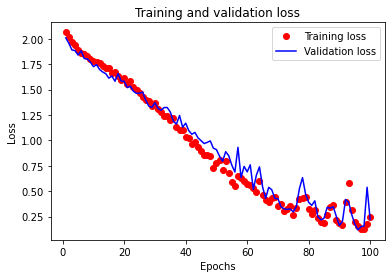

In [14]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


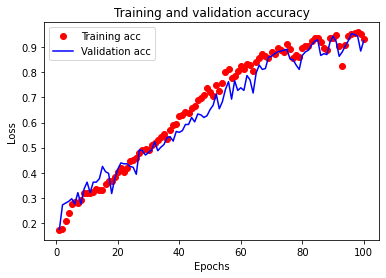

In [15]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

289/289 [==============================] - 0s 491us/step


[0.19875915037954683, 0.9238754510879517]

In [17]:
model_A.save_weights("Modeled2_2LSTM.h5")

In [27]:
path_=input()
#path_ = 'C:/Users/Dell/Downloads/MaheshMajor/Dataset/audio_speech_actors_01-24/Actor_12/03-01-02-01-02-01-12.wav'
#path_ ='C:/Users/Dell/Downloads/MaheshMajor/my_Audio_file.wav'

C:\Users\Dell\Desktop\randomexamples\03-01-04-02-01-02-24.wav


In [28]:
import IPython.display as ipd
ipd.Audio(path_)

In [29]:
a = extract_mfcc(path_)

In [30]:
a.shape

(40,)

In [31]:
a1 = np.asarray(a)
a1.shape

(40,)

In [32]:
q = np.expand_dims(a1,-1)
qq = np.expand_dims(q,0)
qq.shape

(1, 40, 1)

In [33]:
pred = model_A.predict(qq)
pred

array([[1.8689753e-03, 1.4413723e-04, 1.6194081e-02, 3.2199827e-01,
        2.5568898e-03, 5.5777138e-01, 9.8805070e-02, 6.6111365e-04]],
      dtype=float32)

In [34]:
preds=pred.argmax(axis=1)
preds

array([5], dtype=int64)

In [35]:
emotions=['Neutral','Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised']
print(emotions[preds[0]])

Fearful
